In [445]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [446]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [447]:
# looking into the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [448]:
# View some statistical details
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [449]:
# data cleaning
column_name = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[column_name] = dataset[column_name].replace(0, np.nan)

In [450]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [451]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

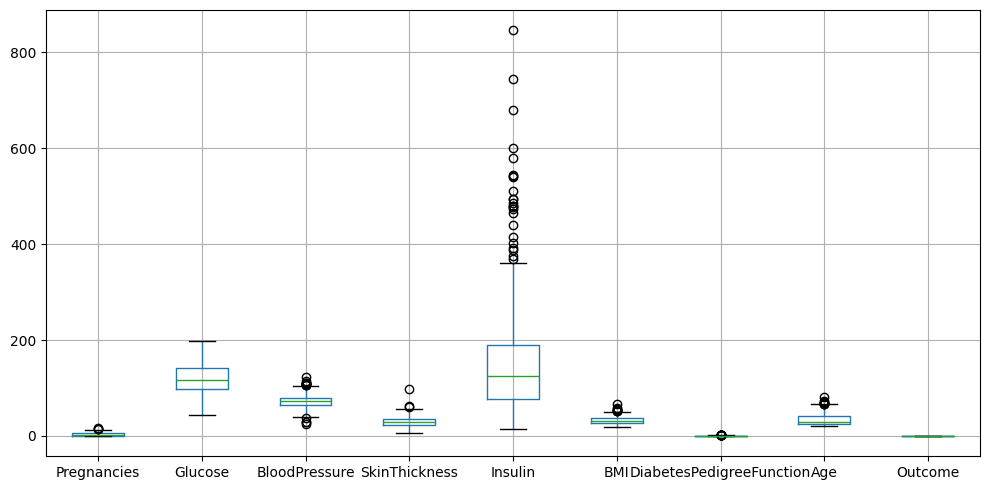

In [452]:
#boxplot

dataset.boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()

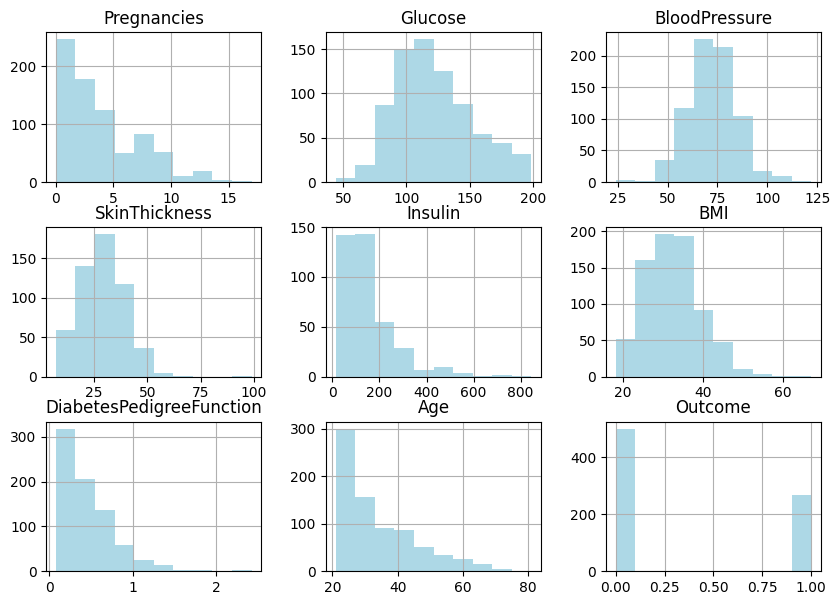

In [453]:
#histogram
dataset.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

In [454]:
# Filling glucose, bloodpressure with mean
# FIlling skinthickness and insulin, BMI with median (skewed or outliers)
# fillna function

dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].fillna(dataset['Glucose'].median())
dataset['Insulin'] = dataset['Insulin'].fillna(dataset['Glucose'].median())
dataset['BMI'] = dataset['BMI'].fillna(dataset['Glucose'].median())


In [455]:
# looking into the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [456]:
# Print dataset after inputing missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [457]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,121.686763,55.118490,136.776042,33.668359,0.471876,33.240885,0.348958
std,3.369578,30.435949,30.435949,41.062553,87.179770,12.178062,0.331329,11.760232,0.476951
min,0.000000,44.000000,44.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,99.750000,25.000000,117.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,117.000000,35.000000,117.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,140.250000,117.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,199.000000,117.000000,846.000000,117.000000,2.420000,81.000000,1.000000


In [458]:
# counting the number of diabetic and non diabetic from the dataset
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

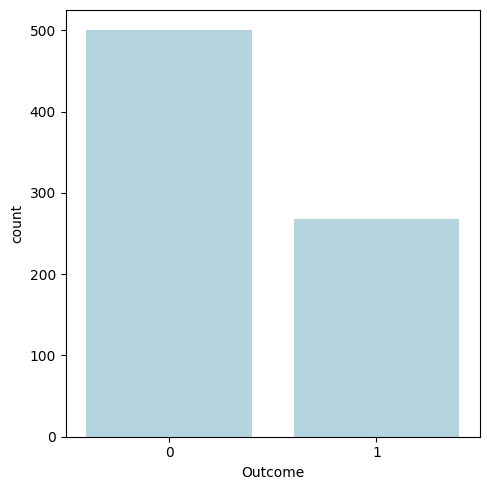

In [459]:
# plot a chart
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outcome', data = dataset, color='lightblue')
plt.tight_layout()
plt.show()

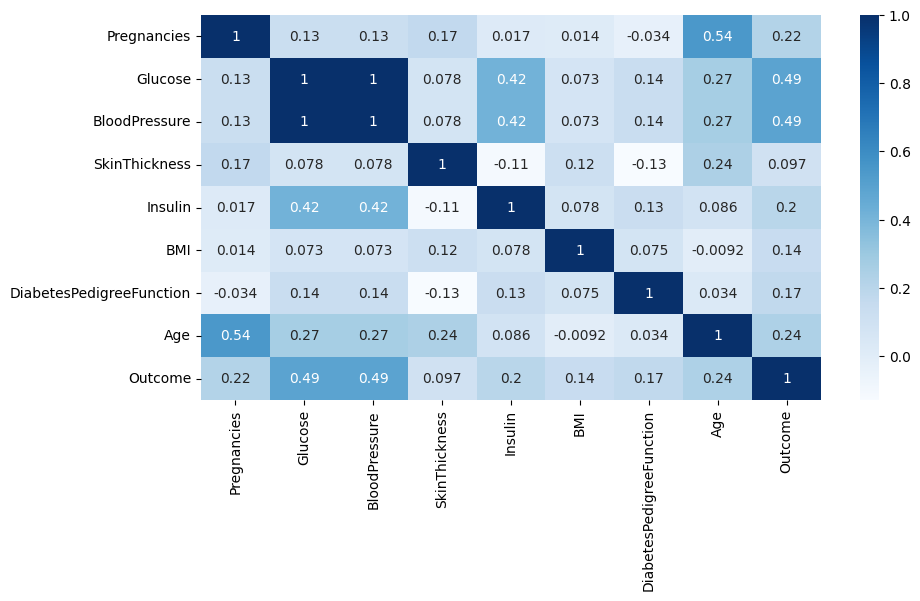

In [460]:
# Corrrelation matrix
plt.figure(figsize=(10,5))
corr_mat = dataset.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)
plt.show()

In [461]:
# independent and dependent variable
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [462]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [463]:
# split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

In [464]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,6,134.0,134.0,23.0,130.0,35.4,0.542,29
346,1,139.0,139.0,19.0,83.0,28.7,0.654,22
511,0,139.0,139.0,17.0,210.0,22.1,0.207,21
121,6,111.0,111.0,39.0,117.0,34.2,0.260,24
241,4,91.0,91.0,32.0,88.0,33.1,0.446,22
...,...,...,...,...,...,...,...,...
403,9,72.0,72.0,25.0,117.0,31.6,0.280,38
88,15,136.0,136.0,32.0,110.0,37.1,0.153,43
310,6,80.0,80.0,30.0,117.0,26.2,0.313,41
555,7,124.0,124.0,33.0,215.0,25.5,0.161,37


In [465]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [466]:
X_train

array([[ 0.61641522,  0.4407303 ,  0.4407303 , ...,  0.14630628,
         0.20737795, -0.37287975],
       [-0.85869607,  0.60657738,  0.60657738, ..., -0.42111355,
         0.53685119, -0.95665941],
       [-1.15371833,  0.60657738,  0.60657738, ..., -0.98006443,
        -0.77810007, -1.04005651],
       ...,
       [ 0.61641522, -1.35041815, -1.35041815, ..., -0.63283737,
        -0.46627717,  0.62788539],
       [ 0.91143748,  0.10903614,  0.10903614, ..., -0.69212004,
        -0.91341944,  0.29429701],
       [-1.15371833,  0.67291621,  0.67291621, ..., -0.1077623 ,
        -0.11327012, -0.95665941]])

In [467]:
""" # Can also try robust scaling or minmaxscaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) """

' # Can also try robust scaling or minmaxscaler\nsc = RobustScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test) '

In [468]:
X_train

array([[ 0.61641522,  0.4407303 ,  0.4407303 , ...,  0.14630628,
         0.20737795, -0.37287975],
       [-0.85869607,  0.60657738,  0.60657738, ..., -0.42111355,
         0.53685119, -0.95665941],
       [-1.15371833,  0.60657738,  0.60657738, ..., -0.98006443,
        -0.77810007, -1.04005651],
       ...,
       [ 0.61641522, -1.35041815, -1.35041815, ..., -0.63283737,
        -0.46627717,  0.62788539],
       [ 0.91143748,  0.10903614,  0.10903614, ..., -0.69212004,
        -0.91341944,  0.29429701],
       [-1.15371833,  0.67291621,  0.67291621, ..., -0.1077623 ,
        -0.11327012, -0.95665941]])

In [469]:
X_test

array([[ 0.61641522,  0.8719327 ,  0.8719327 , ..., -0.35336193,
        -0.8634101 ,  1.37845924],
       [ 0.91143748,  0.70608563,  0.70608563, ..., -0.27714135,
        -1.01049637,  0.79467958],
       [-0.56367381, -0.05681094, -0.05681094, ..., -1.19178825,
         1.06047832,  3.21319533],
       ...,
       [ 0.32139296, -0.38850509, -0.38850509, ...,  0.1801821 ,
         0.12500963, -0.70646813],
       [ 1.20645974, -0.02364152, -0.02364152, ..., -0.7344648 ,
        -0.18387153,  2.54601857],
       [-0.56367381,  1.80067634,  1.80067634, ..., -0.91231281,
        -0.42803474, -0.95665941]])

In [470]:
# Logisitic regression model
# Extentention of linear regression. converting output into 0,1 (for binary classfication)
# Linear relationshop between the features we are workign with.

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [471]:
# Predict on the test data
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [472]:
# Putting in a dataframe
df = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred_log})
df

,Actual_value,Predicted_value
642,1,1
695,1,0
453,0,0
565,0,0
99,1,0
...,...,...
455,1,1
354,0,0
216,1,0
509,0,0


In [473]:
accuracy_score(y_test, y_pred_log)

0.7662337662337663

In [474]:
# model evaluation 
# r2, mean absolute error, mean square error, root mean square error
# 0, 1
# mae must have a lower mae 0. 
# mse --o.
# rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_log)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_log)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_log)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_log))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: -0.010204081632653184
Mean Absolute Error: 0.23376623376623376
Mean Square Error: 0.23376623376623376
Root Mean Square Error: 0.48349377841522817
